In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
directory_path = '/content/drive/My Drive/ML Project/.kaggle/'

In [3]:
import zipfile

zip_file_path = 'train.csv.zip'
zip_file_path1 = 'test.csv.zip'
zip_file_path2 = 'macro.csv.zip'

# # Extract the contents of the train zip file
# with zipfile.ZipFile(directory_path+zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(directory_path)

# Extract the contents of the test zip file
with zipfile.ZipFile(directory_path+zip_file_path1, 'r') as zip_ref:
    zip_ref.extractall(directory_path)

# Extract the contents of the test zip file
with zipfile.ZipFile(directory_path+zip_file_path2, 'r') as zip_ref:
    zip_ref.extractall(directory_path)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train=pd.read_csv(directory_path+'train.csv',parse_dates=['timestamp'])
test=pd.read_csv(directory_path+'test.csv')
macro=pd.read_csv(directory_path+'macro.csv')

In [5]:
train.head()
train.shape

(30471, 292)

In [6]:
print(train.columns)
train.describe()

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)


,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


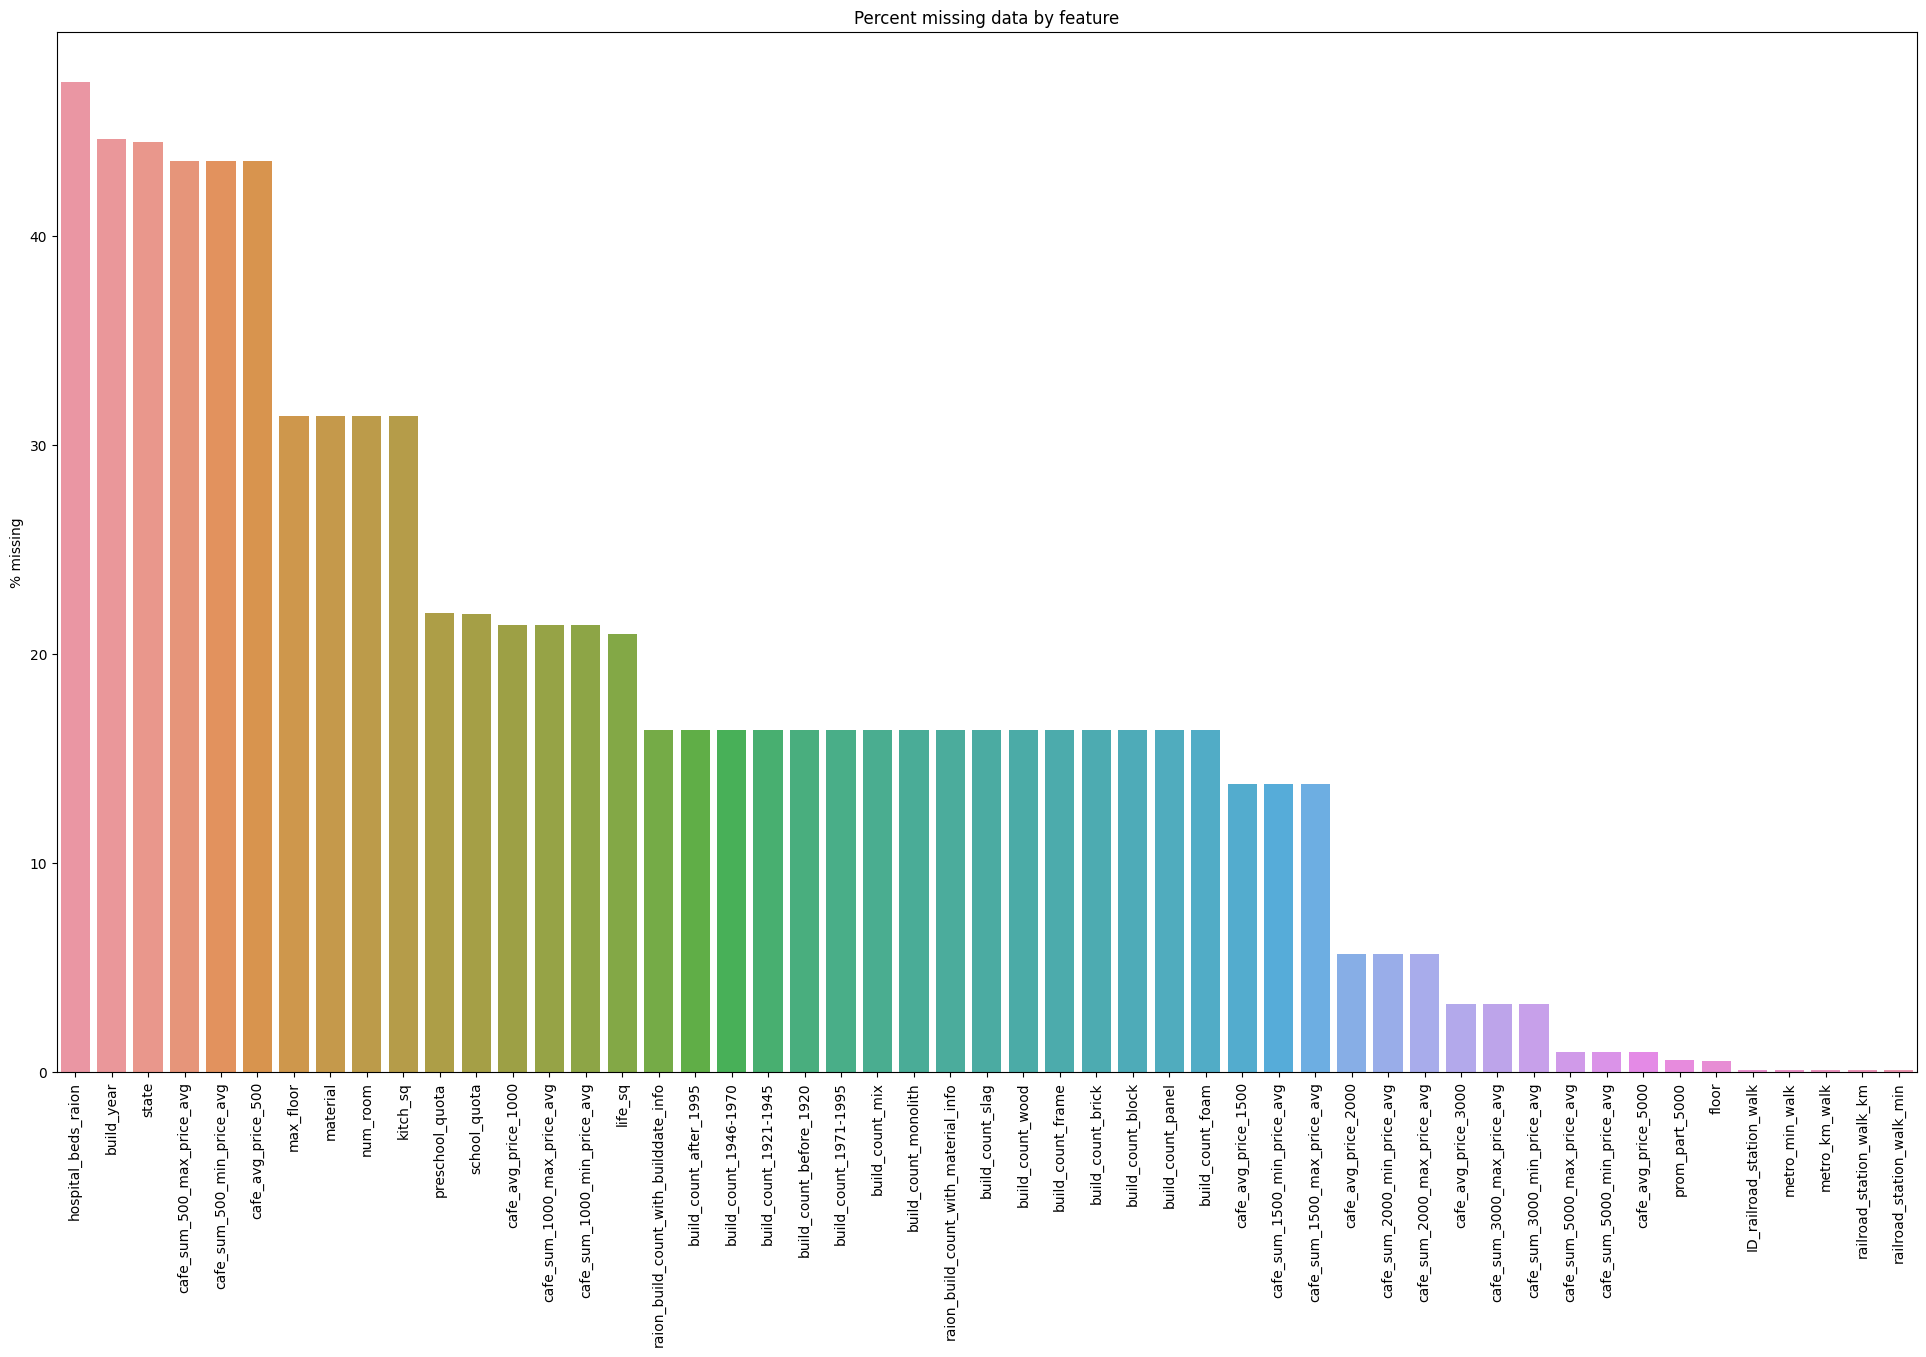

In [7]:
# Visualize percentage of data that is missing
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(24, 16))
plt.xticks(rotation='vertical')
sns.barplot(x=train_na.index, y=train_na)
ax.set(title='Percent missing data by feature', ylabel='% missing')
plt.subplots_adjust(top = 0.95, bottom = 0.3)
plt.show()

In [8]:
train['price_doc'].describe()


count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

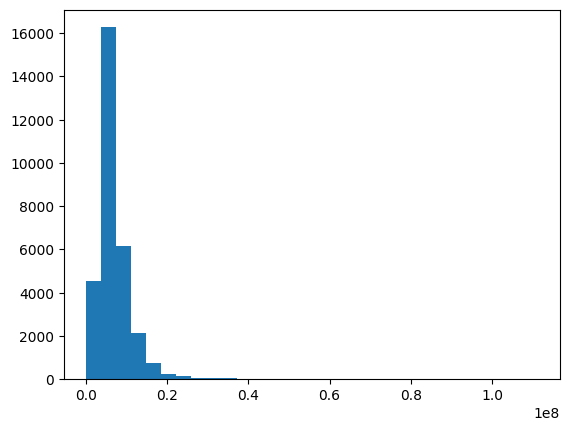

In [9]:
# Visualising the distribution of the response variable
plt.hist(train['price_doc'],bins=30)
plt.show()

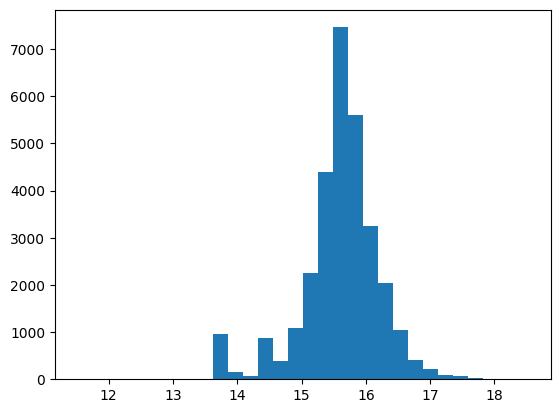

In [10]:
# log of the response variable
train['price_doc_log'] = np.log1p(train['price_doc'])
plt.hist(train['price_doc_log'], bins = 30)
plt.show()

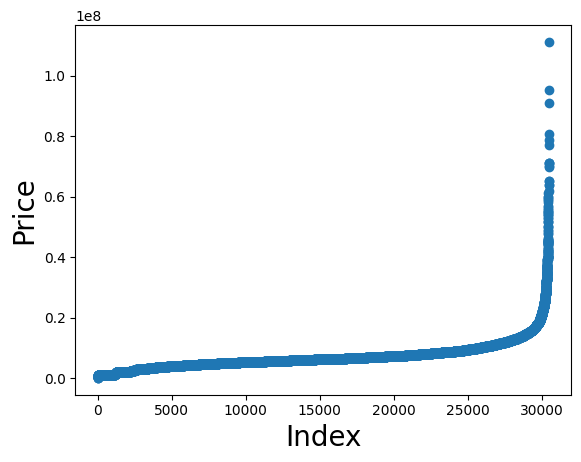

In [11]:
# Scatterplot of response variable
plt.scatter(range(train.shape[0]), np.sort(train.price_doc.values))
plt.xlabel('Index', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

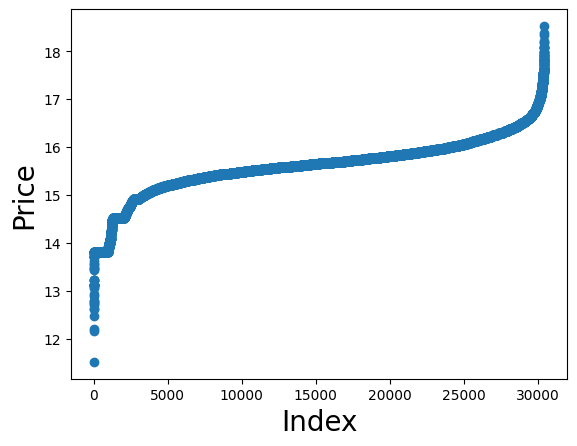

In [12]:
# Scatterplot of log of response variable

plt.scatter(range(train.shape[0]), np.sort(train.price_doc_log.values))
plt.xlabel('Index', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

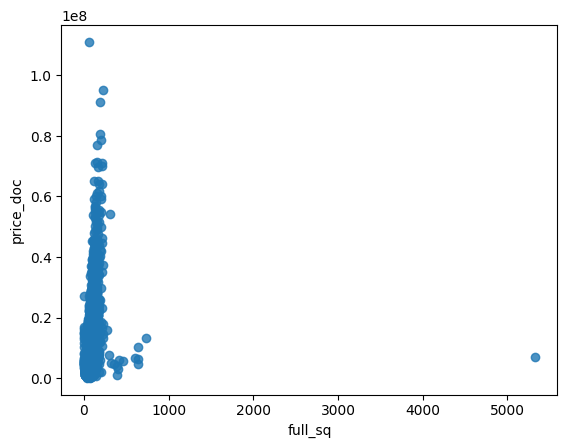

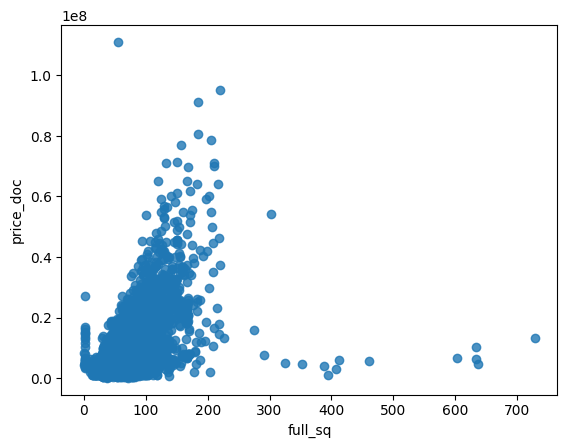

In [13]:
# Price_doc vs other variables
# (i) Area with and without outliers
sns.regplot(x = 'full_sq', y = 'price_doc', data = train, fit_reg = False)
plt.show()
sns.regplot(x = 'full_sq', y = 'price_doc', data = train[train['full_sq'] < 1000]  , fit_reg = False)
plt.show()

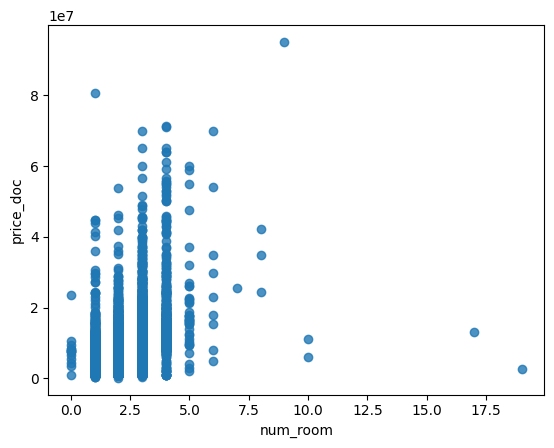

In [14]:
#(ii) No. of rooms
sns.regplot(x = 'num_room', y = 'price_doc', data = train, fit_reg = False)
plt.show()


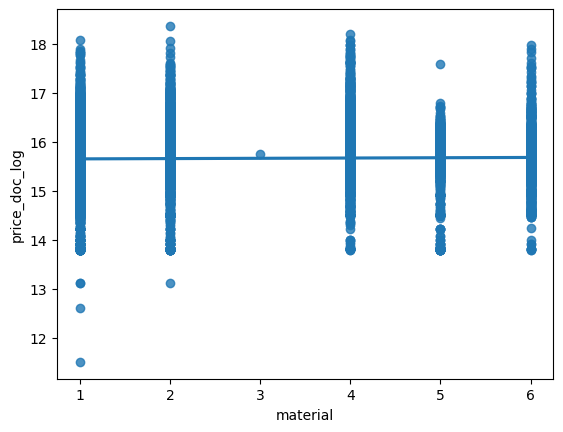

In [15]:
#(iii) Construction Material
sns.regplot(x = 'material', y = 'price_doc_log', data = train)
plt.show()


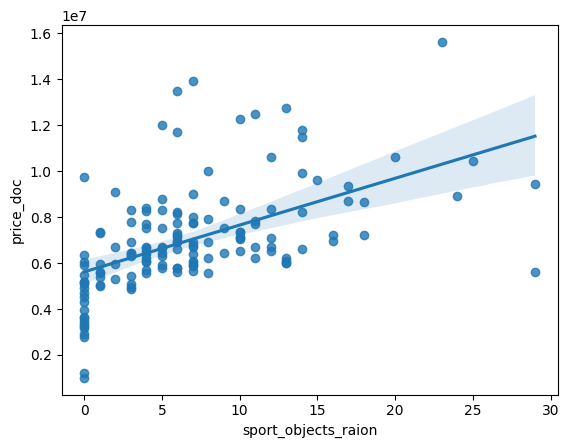

In [16]:
#(iv) No of sports areas in vicinity
train_sportsgrp = train.groupby('sub_area')[['sport_objects_raion', 'price_doc']].median()
sns.regplot(x = 'sport_objects_raion', y = 'price_doc', data = train_sportsgrp, ci = 95)
plt.show()

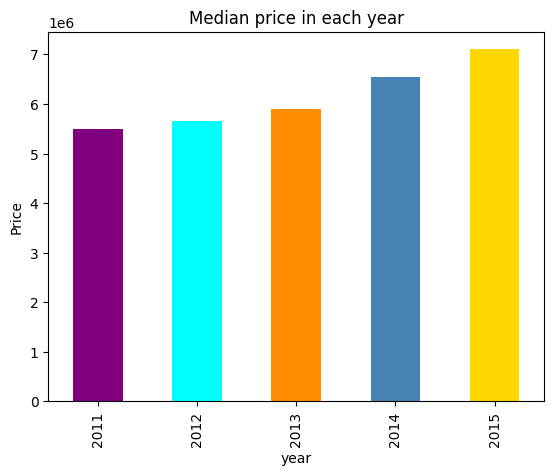

In [17]:
# Bivariate analysis: Visualising the prices in different years

train['year'] = train['timestamp'].map(lambda x: x.year)

colors = ['purple', 'cyan', 'darkorange', 'steelblue', 'gold', 'mediumseagreen', 'lightcoral', 'orchid', 'cornflowerblue', 'mediumaquamarine']



train.price_doc.groupby(train.year).median().plot.bar(color = colors)

plt.ylabel('Price')
plt.title('Median price in each year')
plt.show()

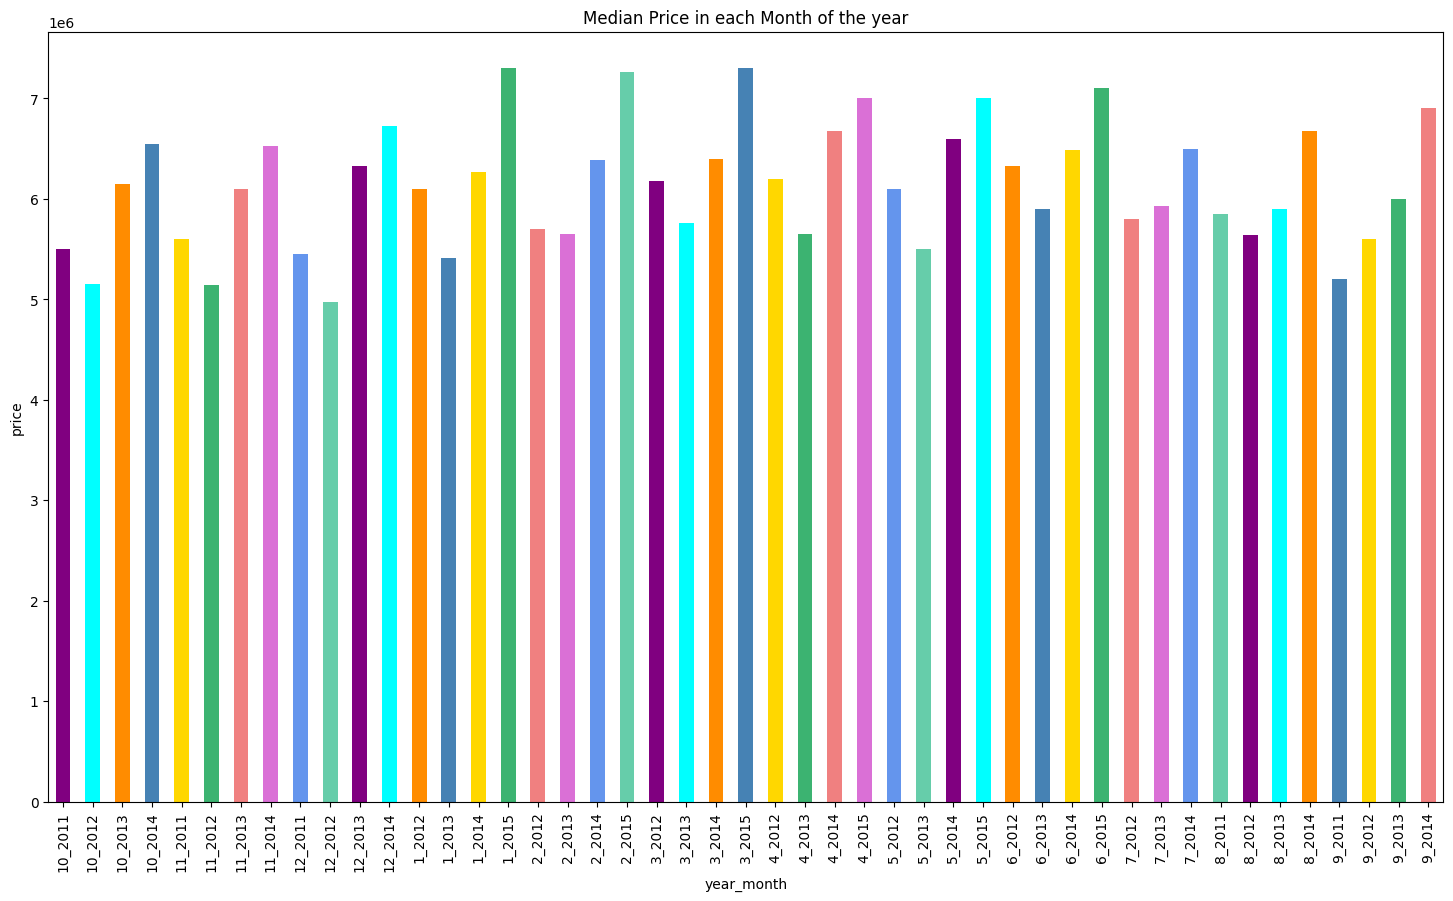

In [18]:
# We can also do this for sepearate months

train['year_month'] = train['timestamp'].map(lambda x: str(x.month)+'_'+str(x.year))

colors = ['purple', 'cyan', 'darkorange', 'steelblue', 'gold', 'mediumseagreen', 'lightcoral', 'orchid', 'cornflowerblue', 'mediumaquamarine']

plt.figure(figsize=(18,10))

train.price_doc.groupby(train.year_month).median().plot.bar(color = colors)

plt.ylabel('price')
plt.title('Median Price in each Month of the year')
plt.show()